In [211]:
import numpy as np
import matplotlib.pylab as plt
from math import exp,log,sqrt,pi,sin
import scipy.stats as sts
import pandas as pd
%matplotlib inline

ImportError: cannot import name 'display' from 'html' (C:\Users\Alejandro\Anaconda3\lib\html\__init__.py)

## Prueba de Kendall

In [2]:
Q = lambda A,B:((B[1]-A[1])*(B[0]-A[0])>0)*1+((B[1]-A[1])*(B[0]-A[0])<0)*-1

In [3]:
X = np.random.uniform(0,1,200)
u =np.random.choice([0,1],200)
Y = (np.random.normal(0,0.5,200)-5*X)*u+(np.random.normal(0,0.5,200)+5*X)*(1-u)
n = len(X)

In [8]:
[X[2],Y[2]]

[0.8126094297594407, -4.180861346418206]

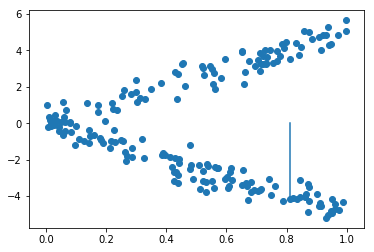

In [14]:
plt.scatter(X,Y)
plt.plot([X[2],X[2]],[Y[2],0])

In [15]:
K = sum([sum([Q([X[i],Y[i]],[X[j],Y[j]]) for j in range(i+1,n)]) for i in range(n-1)])
K0 = K/sqrt(n*(n-1)*(2*n+5)/18)
K0

-1.5745391852881327

In [75]:
-sts.norm.ppf(0.015)

2.1700903775845606

## Prueba de Spearman
$r_s=\frac{12\sum_{i=1}^{n}(R_i-\frac{n+1}{2})(S_i-\frac{n+1}{2})}{n(n^2-1)}$ $r^*=\sqrt{n-1}r_s$

In [17]:
import pandas as pd

0.2484650994755263


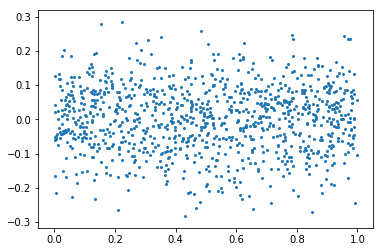

In [326]:
n =1000
tabla = pd.DataFrame(columns=['X','Y','R','S'],index=range(1,n+1))
tabla['X'] = np.random.uniform(0,1,n)
tabla['Y'] = np.random.normal(0,0.1,n)
tabla = tabla.sort_values(['X'])
tabla['R'] = range(1,n+1)
tabla = tabla.sort_values(['Y'])
tabla['S'] = range(1,n+1)
tabla.sort_index()
rs = 12*((tabla.R - (n+1)/2)*(tabla.S - (n+1)/2)).sum()/(n*(n**2-1))
r0 = sqrt(n-1)*rs
plt.scatter(tabla['X'],tabla['Y'],s=4)
print(r0)

## Prueba de Hoeffding

In [325]:
n = 1000
tabla = pd.DataFrame(columns=['X','Y','R','S','c'],index=range(1,n+1))
tabla['X'] = np.random.uniform(0,1,n)
tabla['Y'] = np.random.normal(0,0.1,n)
tabla = tabla.sort_values(['X'])
tabla['R'] = range(1,n+1)
tabla = tabla.sort_values(['Y'])
tabla['S'] = range(1,n+1)
tabla =tabla.sort_index()
def c(i):
    return(sum([1*(tabla['X'][i]<tabla['X'][j])*(tabla['Y'][i]<tabla['Y'][j]) for j in tabla.index]))
tabla['c'] = [c(i) for i in range(1,n+1)]
Q = sum((tabla.R-1)*(tabla.R-2)*(tabla.S-1)*(tabla.S-2))
R = sum((tabla.R-2)*(tabla.S-2)*tabla.c)
S = sum(tabla.c*(1-tabla.c))
D = (Q-2*(n-2)*R+(n-2)*(n-3)*S)/(n*(n-1)*(n-2)*(n-3)*(n-4))
D

-0.16895013533021355